# Music Popularity Analysis

<hr style="border:2px solid black"> </hr>

## Model Evaluation
## Notebook 02 - Feature Relationships

---

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import scipy as sp

In [2]:
def num_uniques(ser):
    try:
        return len(ser.unique())
    except:
        return "Not unique check-able"


def summarize_df(df):
    print("======DATA SUMMARY======")
    print("{} rows by {} columns".format(df.shape[0], df.shape[1]))
    print("\n======COLUMNS======")
    print(df.dtypes)
    print("\n======PREVIEW======")
    display(df.head())
    print("\n======NUMERICAL COL SUMMARY======")
    print(df.describe())
    print("\n")
    for col in df.columns:
        print("{}: {} unique values".format(col, num_uniques(df[col])))

---
### Import data

In [3]:
df = pd.read_csv('../03_EDA_Transformation/song_data_processed.csv', index_col=[0])
summarize_df(df)

======DATA SUMMARY======
26940 rows by 33 columns

======COLUMNS======
sp_danceability         float64
sp_energy               float64
sp_loudness             float64
sp_speechiness          float64
sp_acousticness         float64
sp_instrumentalness     float64
sp_liveness             float64
sp_valence              float64
sp_tempo                float64
sp_duration_ms            int64
sp_artist_popularity      int64
sp_artist_followers       int64
play_count                int64
sp_key                    int64
sp_mode                   int64
sp_time_signature         int64
sp_time_signature_0     float64
sp_time_signature_1     float64
sp_time_signature_3     float64
sp_time_signature_4     float64
sp_time_signature_5     float64
sp_key_0                float64
sp_key_1                float64
sp_key_2                float64
sp_key_3                float64
sp_key_4                float64
sp_key_5                float64
sp_key_6                float64
sp_key_7                float64
s

,sp_danceability,sp_energy,sp_loudness,sp_speechiness,sp_acousticness,sp_instrumentalness,sp_liveness,sp_valence,sp_tempo,sp_duration_ms,...,sp_key_2,sp_key_3,sp_key_4,sp_key_5,sp_key_6,sp_key_7,sp_key_8,sp_key_9,sp_key_10,sp_key_11
0,0.533,0.804,-7.516,0.0743,0.0211,0.00069,0.1270,0.277,145.023,256073,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.362,0.326,-15.748,0.0423,0.7390,0.79400,0.1040,0.191,179.880,164792,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.760,0.557,-13.295,0.0625,0.0213,0.82200,0.0938,0.719,144.994,202893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.635,0.323,-12.979,0.0338,0.1420,0.53500,0.0974,0.209,179.996,156000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.664,0.440,-5.156,0.0360,0.0531,0.18100,0.0536,0.256,74.735,217600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



======NUMERICAL COL SUMMARY======
       sp_danceability     sp_energy   sp_loudness  sp_speechiness  \
count     26940.000000  26940.000000  26940.000000    26940.000000   
mean          0.529161      0.614964     -9.120079        0.087248   
std           0.185528      0.263511      5.439261        0.103623   
min           0.000000      0.000000    -60.000000        0.000000   
25%           0.403000      0.431000    -11.055250        0.035800   
50%           0.540000      0.655000     -7.679000        0.048000   
75%           0.666000      0.838000     -5.578000        0.085500   
max           0.977000      1.000000      4.106000        0.965000   

       sp_acousticness  sp_instrumentalness   sp_liveness    sp_valence  \
count     26940.000000         26940.000000  26940.000000  26940.000000   
mean          0.298166             0.239801      0.207013      0.419168   
std           0.337638             0.358885      0.184652      0.255309   
min           0.000000            

In [4]:
# Set random seed
r = 0

In [5]:
# Define data
X = np.array(df[[c for c in df.columns if c != 'play_count']])
y = np.array(df['play_count'])

In [6]:
# Make overall test_train split
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=r)

---
### Lasso Regression with P-Value Output

In [7]:
X_trainval = sm.add_constant(X_trainval)
est = sm.OLS(y_trainval, X_trainval).fit_regularized(alpha=825, L1_wt=1, refit=True)
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     195.1
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:08:03   Log-Likelihood:            -3.2394e+05
No. Observations:               21552   AIC:                         6.479e+05
Df Residuals:                   21527   BIC:                         6.481e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.511e+05   9.02e+04     -1.676      0.0

/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1860: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(eigvals[0]/eigvals[-1])


In [8]:
[c for c in df.columns if c != 'play_count']

['sp_danceability',
 'sp_energy',
 'sp_loudness',
 'sp_speechiness',
 'sp_acousticness',
 'sp_instrumentalness',
 'sp_liveness',
 'sp_valence',
 'sp_tempo',
 'sp_duration_ms',
 'sp_artist_popularity',
 'sp_artist_followers',
 'sp_key',
 'sp_mode',
 'sp_time_signature',
 'sp_time_signature_0',
 'sp_time_signature_1',
 'sp_time_signature_3',
 'sp_time_signature_4',
 'sp_time_signature_5',
 'sp_key_0',
 'sp_key_1',
 'sp_key_2',
 'sp_key_3',
 'sp_key_4',
 'sp_key_5',
 'sp_key_6',
 'sp_key_7',
 'sp_key_8',
 'sp_key_9',
 'sp_key_10',
 'sp_key_11']

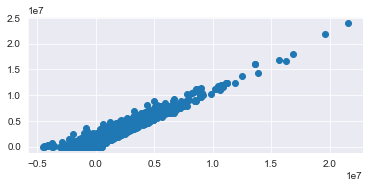

In [9]:
pred_val = est.fittedvalues.copy()
true_val = y_trainval.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, true_val)

0.360685241195193

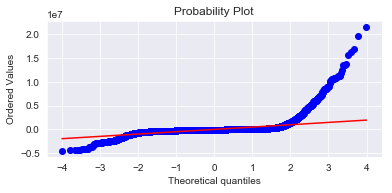

In [10]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2

---
### Log-transforming response variable

In [11]:
y_log_trainval = np.log(y_trainval)

/Users/andrewtaylor/opt/anaconda3/envs/isye6740-project/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


In [12]:
y_log_trainval[y_log_trainval == -np.inf] = 0

In [28]:
X_trainval = sm.add_constant(X_trainval)
est_log = sm.OLS(y_log_trainval, X_trainval).fit()
print(est_log.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     346.6
Date:                Wed, 27 Apr 2022   Prob (F-statistic):               0.00
Time:                        12:09:51   Log-Likelihood:                -54479.
No. Observations:               21552   AIC:                         1.090e+05
Df Residuals:                   21523   BIC:                         1.092e+05
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4982      0.236     10.570      0.0

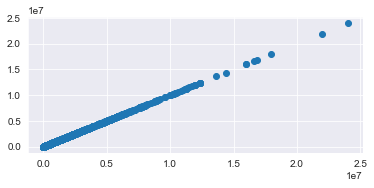

In [17]:
pred_val = est_log.fittedvalues.copy()
true_val = y_trainval.copy()
residual = true_val - pred_val

fig, ax = plt.subplots(figsize=(6, 2.5))
_ = ax.scatter(residual, true_val)

0.21194914265575127

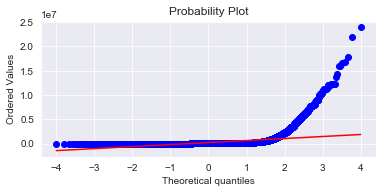

In [18]:
fig, ax = plt.subplots(figsize=(6, 2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2